## Diabetes Prediction

---
**The objective of this study is to comprehensively explore various health-related variables and their intricate relationships in order to classify diabetes accurately. These variables include aspects such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.**

**Features**

Column | Definition
--- | -----------
Age | Age is an important factor in predicting diabetes risk. As individuals get older, their risk of developing diabetes increases.
Gender |  Gender can play a role in diabetes risk, although the effect may vary.
BMI | BMI, or Body Mass Index, is a numerical measure of a person's weight in relation to their height, commonly used to assess body composition and potential health risks.
Hypertension | Hypertension, or high blood pressure, is a condition that often coexists with diabetes.
Heart Disease | Heart disease, including conditions such as coronary artery disease and heart failure, is associated with an increased risk of diabetes.
Smoking History | Smoking is a modifiable risk factor for diabetes.
HbA1c Level | HbA1c, also known as glycated hemoglobin, provides a retrospective view of average blood glucose levels spanning the preceding 2-3 months.
Blood Glucose Level | Blood glucose level pertains to the immediate concentration of glucose (sugar) within the bloodstream at a specific moment.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

In [2]:
df = pd.read_csv('C:\\Users\\hp\\Desktop\\diabetes_prediction_dataset.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


#### Checking correlation between features

<Axes: >

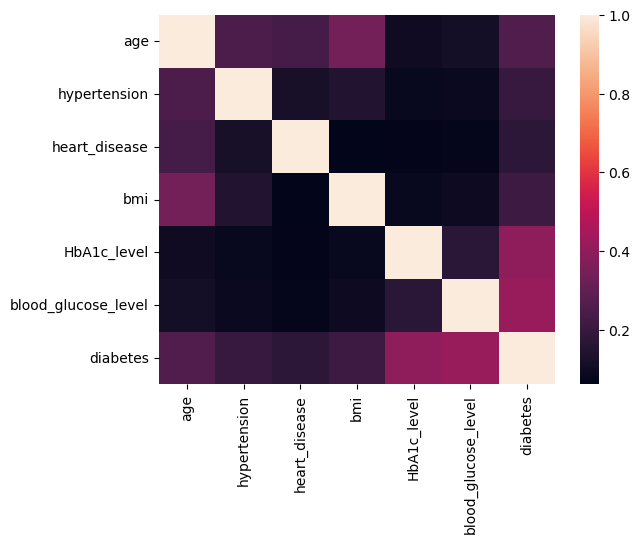

In [6]:
sns.heatmap(df.corr(numeric_only = True))

#### Checking which feature is highly correlated with 'diabetes'

In [7]:
df.corr(numeric_only = True)['diabetes'].sort_values()

heart_disease          0.171727
hypertension           0.197823
bmi                    0.214357
age                    0.258008
HbA1c_level            0.400660
blood_glucose_level    0.419558
diabetes               1.000000
Name: diabetes, dtype: float64

### Observing Features

#### Counts per category for each feature.

In [8]:
for column_name in df.columns:
    print(f'Value counts for column {column_name}:')
    print(df[column_name].value_counts())
    print()  


Value counts for column gender:
Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

Value counts for column age:
80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: age, Length: 102, dtype: int64

Value counts for column hypertension:
0    92515
1     7485
Name: hypertension, dtype: int64

Value counts for column heart_disease:
0    96058
1     3942
Name: heart_disease, dtype: int64

Value counts for column smoking_history:
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

Value counts for column bmi:
27.32    25495
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
58.23        1
48.18        1
55.57        1
57.07        1
60.52        1
Name: bmi, Length: 4247, dtype: int64

Value counts for column HbA1c_level:
6.6    

#### Relation between age of person and diabetes

<Axes: xlabel='diabetes', ylabel='age'>

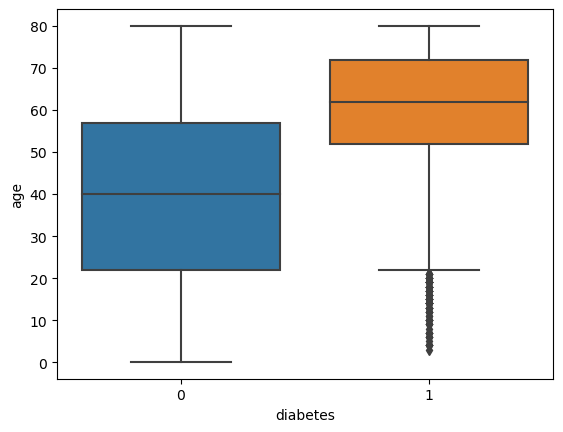

In [9]:
sns.boxplot(data = df, x = 'diabetes', y = 'age')
# It shows relatively older persons suffer from diabetes

#### Relation between BMI of person and diabetes

<Axes: xlabel='diabetes', ylabel='bmi'>

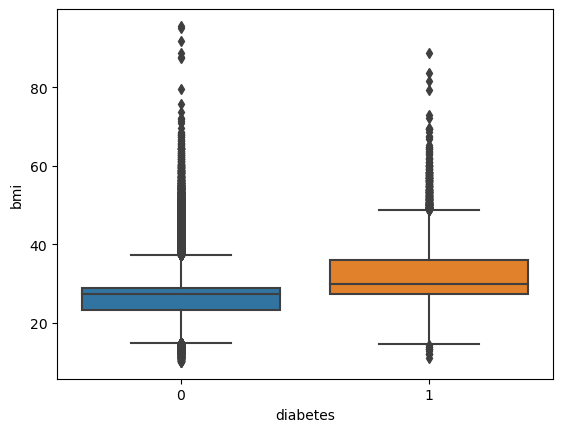

In [10]:
sns.boxplot(data = df, x = 'diabetes', y = 'bmi')

#### Relation between HbA1c_level of person and diabetes

<Axes: xlabel='diabetes', ylabel='HbA1c_level'>

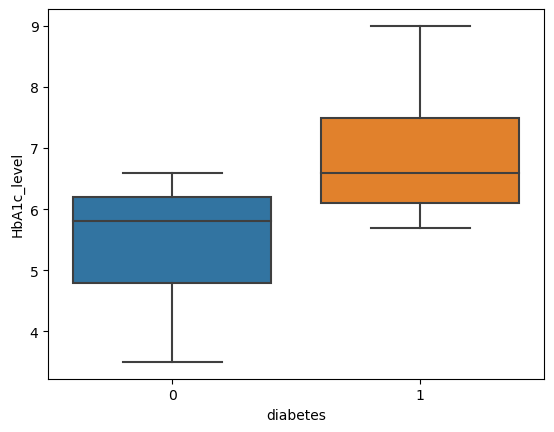

In [11]:
sns.boxplot(data = df, x = 'diabetes', y = 'HbA1c_level')
# it shows people with relatively higher average blood glucose level over past 2-3 months(long term), suffer more from diabetes.

#### Relation between gender of person and diabetes

<Axes: xlabel='gender', ylabel='count'>

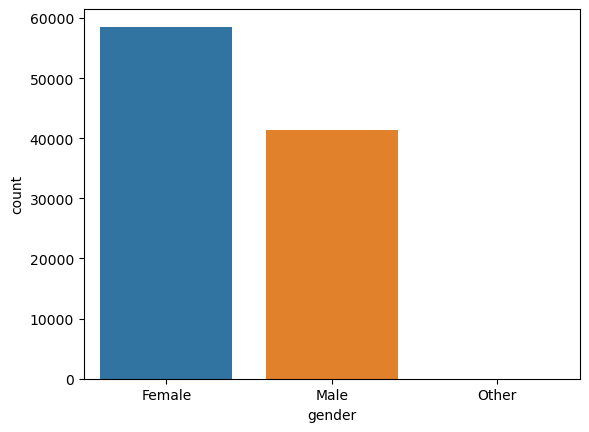

In [12]:
sns.countplot(data = df, x = 'gender')

In [13]:
# Removing unnecessary 'other' category from gender column as it occurs only 18 times in the dataset
df = df[df['gender'] != 'Other']

### Dealing with missing values

In [14]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

#### Countplot to observe different categories of Smoking History feature

<Axes: xlabel='smoking_history', ylabel='count'>

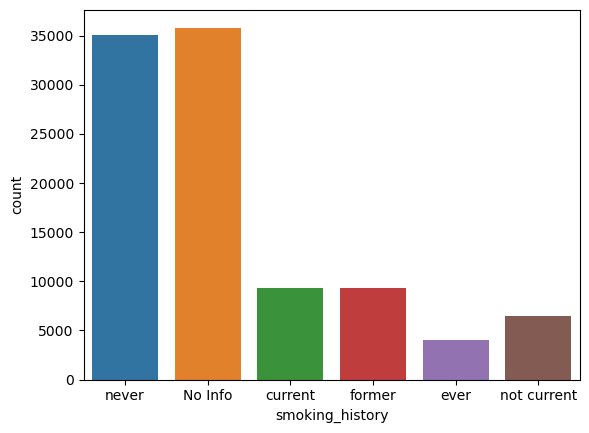

In [15]:
sns.countplot(data = df, x = 'smoking_history')

In [16]:
# We observe that 'smoking_history' column has 35816 'No Info' values. We need to replace these null values.
# We can also combine 'ever', 'former' and 'not current' smoking categories.
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non smoker'
    elif smoking_status in ['current']:
        return 'current smoker'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past smoker'

In [17]:
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

In [18]:
df['smoking_history'].value_counts()

non smoker        70902
past smoker       19794
current smoker     9286
Name: smoking_history, dtype: int64

In [19]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,non smoker,25.19,6.6,140,0
1,Female,54.0,0,0,non smoker,27.32,6.6,80,0
2,Male,28.0,0,0,non smoker,27.32,5.7,158,0
3,Female,36.0,0,0,current smoker,23.45,5.0,155,0
4,Male,76.0,1,1,current smoker,20.14,4.8,155,0


#### One Hot Encoding

In [20]:
# We need to do one hot encoding for "gender" and "smoking_history" column

In [21]:
df_dummies_gender = pd.get_dummies(df['gender'], drop_first = True)
df = df.drop('gender',axis = 1)  # dropping original gender column
df = pd.concat([df_dummies_gender,df], axis = 1)     # replacing it with dummy column

In [22]:
df.head()

,Male,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,non smoker,25.19,6.6,140,0
1,0,54.0,0,0,non smoker,27.32,6.6,80,0
2,1,28.0,0,0,non smoker,27.32,5.7,158,0
3,0,36.0,0,0,current smoker,23.45,5.0,155,0
4,1,76.0,1,1,current smoker,20.14,4.8,155,0


In [23]:
df_dummies_smoker = pd.get_dummies(df['smoking_history'], drop_first = True)
df = df.drop('smoking_history',axis = 1)  # dropping original smoking_history column
df = pd.concat([df_dummies_smoker,df], axis = 1)     # replacing it with dummy column

In [24]:
df.head()

,non smoker,past smoker,Male,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,0,0,80.0,0,1,25.19,6.6,140,0
1,1,0,0,54.0,0,0,27.32,6.6,80,0
2,1,0,1,28.0,0,0,27.32,5.7,158,0
3,0,0,0,36.0,0,0,23.45,5.0,155,0
4,0,0,1,76.0,1,1,20.14,4.8,155,0


### Logistic Regression

#### Preparing dataset for Logistic Regression by removing Outliers

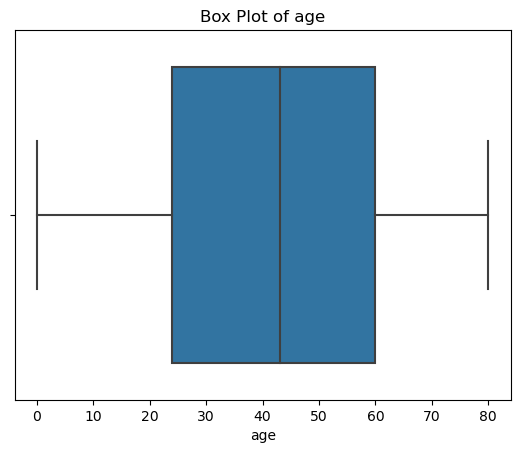

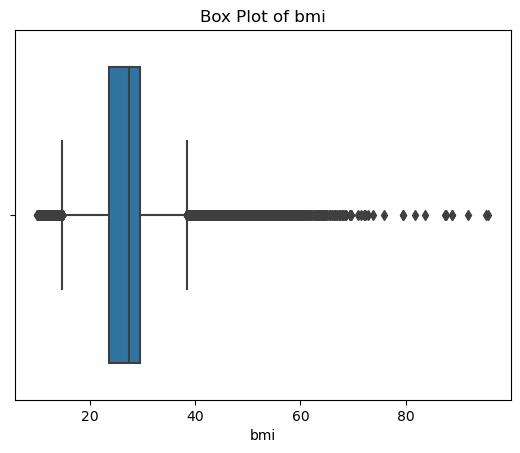

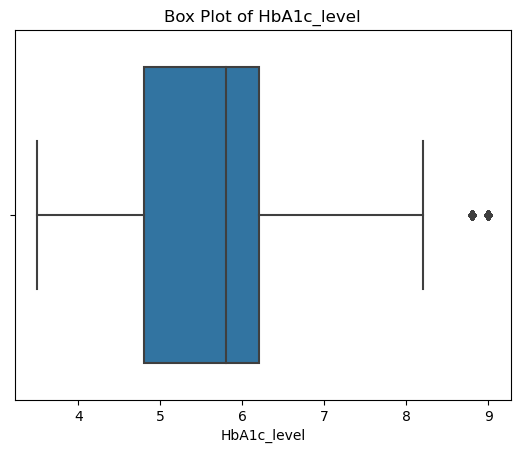

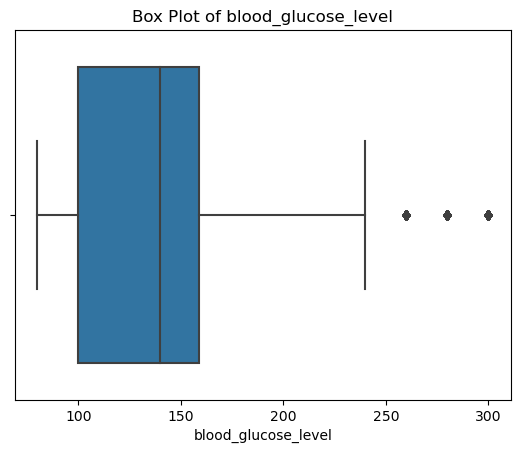

In [25]:
# First drawing boxplots of different continuous features

columns_to_plot = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

for column in columns_to_plot:
    plt.figure()  # Create a new figure for each box plot
    sns.boxplot(data=df, x=column)
    plt.title(f"Box Plot of {column}")
    plt.show()

In [26]:
new_df = df.copy()
# Removing Outliers from 'bmi' feature
q1,q3 = np.percentile(new_df['bmi'], [25,75])
iqr = q3-q1
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
new_df = new_df[new_df['bmi']>lower_limit]
new_df = new_df[new_df['bmi']<upper_limit]

#### Separating X features and y labels

In [31]:
# Using dataframe with removed outliers
X_lg = new_df.drop('diabetes',axis = 1)
y_lg = new_df['diabetes']

In [32]:
from sklearn.model_selection import train_test_split

#### Train Test Split

In [33]:
X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(X_lg, y_lg, test_size=0.3, random_state=101)

#### Scaling the features

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
X_train_lg = scaler.fit_transform(X_train_lg)
X_test_lg = scaler.transform(X_test_lg)

#### Creating Logistic Regression Model

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
log_model = LogisticRegression(max_iter = 100000, class_weight = 'balanced')

In [39]:
param_grid = {'penalty' : ['l1','l2','elasticnet'],
              'C' : [0.01,0.1,10,100]}

#### GridSearchCV for hyperparameter tuning

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
grid_log_model = GridSearchCV(estimator = log_model, param_grid = param_grid,cv = 5,verbose = 2, n_jobs = 3)

#### Fitting X_train and y_train of dataframe with removed outliers

In [42]:
grid_log_model.fit(X_train_lg,y_train_lg)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' pen

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=100000),
             n_jobs=3,
             param_grid={'C': [0.01, 0.1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=2)

In [43]:
grid_log_model.best_params_

{'C': 0.01, 'penalty': 'l2'}

#### Prediction

In [47]:
y_pred_lg = grid_log_model.predict(X_test_lg)

#### Checking Performance

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [49]:
print('Accuracy is: ',accuracy_score(y_test_lg,y_pred_lg))
print('Confusion Matrix is: ')
print(confusion_matrix(y_test_lg,y_pred_lg))
print('Classification Report: ')
print(classification_report(y_test_lg,y_pred_lg))

Accuracy is:  0.8851811984212414
Confusion Matrix is: 
[[22894  2917]
 [  283  1776]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.89      0.93     25811
           1       0.38      0.86      0.53      2059

    accuracy                           0.89     27870
   macro avg       0.68      0.87      0.73     27870
weighted avg       0.94      0.89      0.90     27870



### Preparing Dataset to apply Decision Tree and Random Forest Classifier

#### Separating X and y

In [58]:
X = df.drop('diabetes',axis = 1)
y = df['diabetes']

#### Train Test Split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Scaling

In [60]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
tree_model = DecisionTreeClassifier(class_weight='balanced')

In [81]:
# Number of features to consider at every split
max_features = [0.4,0.8,1]

# Maximum number of levels in tree
max_depth = [8,15,25]

In [82]:
param_grid = {'max_features':max_features,
              'max_depth' : max_depth}

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
tree_grid = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv = 5, verbose = 2, n_jobs = 3)

In [85]:
tree_grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=3,
             param_grid={'max_depth': [8, 15, 25],
                         'max_features': [0.4, 0.8, 1]},
             verbose=2)

In [86]:
tree_grid.best_params_

{'max_depth': 25, 'max_features': 0.4}

#### Prediction

In [87]:
y_tree_pred = tree_grid.predict(X_test)

#### Observing Performance

In [88]:
print('Accuracy is: ',accuracy_score(y_test,y_tree_pred))
print('Confusion Matrix is: ')
print(confusion_matrix(y_test,y_tree_pred))
print('Classification Report: ')
print(classification_report(y_test,y_tree_pred))

Accuracy is:  0.9488248041340224
Confusion Matrix is: 
[[26559   837]
 [  698  1901]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     27396
           1       0.69      0.73      0.71      2599

    accuracy                           0.95     29995
   macro avg       0.83      0.85      0.84     29995
weighted avg       0.95      0.95      0.95     29995



### Random Forest Classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [443]:
rfc_model = RandomForestClassifier(class_weight = 'balanced')

In [460]:
# Number of trees in the Random Forest
n_estimators = [100,175]

# Maximum number of levels in tree
max_depth = [8,17]

# Number of features to consider at every split
max_features = [0.3,0.8]

In [461]:
param_grid = {'n_estimators':n_estimators,
              'max_depth' : max_depth,
              'max_features' : max_features}

In [462]:
from sklearn.model_selection import GridSearchCV

In [463]:
rfc_grid = GridSearchCV(estimator = rfc_model, param_grid=param_grid, cv = 5, verbose = 2, n_jobs = 3)

In [464]:
rfc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=3,
             param_grid={'max_depth': [8, 17], 'max_features': [0.3, 0.8],
                         'n_estimators': [100, 175]},
             verbose=2)

In [465]:
rfc_grid.best_params_

{'max_depth': 17, 'max_features': 0.3, 'n_estimators': 175}

#### Prediction and Performance

In [466]:
y_rfc_pred = rfc_grid.predict(X_test)

In [467]:
print('Accuracy is: ',accuracy_score(y_test,y_rfc_pred))
print('Confusion Matrix is: ')
print(confusion_matrix(y_test,y_rfc_pred))
print('Classification Report: ')
print(classification_report(y_test,y_rfc_pred))

Accuracy is:  0.9559259876646108
Confusion Matrix is: 
[[26725   671]
 [  651  1948]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     27396
           1       0.74      0.75      0.75      2599

    accuracy                           0.96     29995
   macro avg       0.86      0.86      0.86     29995
weighted avg       0.96      0.96      0.96     29995



### Over Sampling

In [243]:
from imblearn.over_sampling import RandomOverSampler

In [244]:
from collections import Counter
os = RandomOverSampler(sampling_strategy = 0.5)
# Increase the minority class such that it becomes 50% of majority class
X_train_os,y_train_os = os.fit_resample(X_train,y_train)
print('The number of classes before over sampling {}'.format(Counter(y_train)))
print('The number of classes after over sampling {}'.format(Counter(y_train_os)))

The number of classes before over sampling Counter({0: 64086, 1: 5901})
The number of classes after over sampling Counter({0: 64086, 1: 32043})


### Decision Tree Classifier with Over Sampling

In [245]:
tree_os_model = DecisionTreeClassifier()

In [436]:
# Number of features to consider at every split
max_features = [0.3,0.5,0.75]

# Maximum number of levels in tree
max_depth = [5,12]

In [437]:
param_grid = {'max_features':max_features,
              'max_depth' : max_depth}

In [438]:
tree_os_grid = GridSearchCV(estimator=tree_os_model, param_grid=param_grid, cv = 5, verbose = 2, n_jobs = 3)

In [439]:
tree_os_grid.fit(X_train_os,y_train_os)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=3,
             param_grid={'max_depth': [5, 12],
                         'max_features': [0.3, 0.5, 0.75]},
             verbose=2)

In [440]:
tree_os_grid.best_params_

{'max_depth': 12, 'max_features': 0.75}

In [441]:
y_tree_os_pred = tree_os_grid.predict(X_test)
print(confusion_matrix(y_test,y_tree_os_pred))
print(accuracy_score(y_test,y_tree_os_pred))
print(classification_report(y_test,y_tree_os_pred))

[[26310  1086]
 [  494  2105]]
0.9473245540923487
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     27396
           1       0.66      0.81      0.73      2599

    accuracy                           0.95     29995
   macro avg       0.82      0.89      0.85     29995
weighted avg       0.95      0.95      0.95     29995



### Random Forest Classifier with OverSampling

In [468]:
rf_os_model = RandomForestClassifier()

In [590]:
# Number of trees in the Random Forest
n_estimators = [100,180]

# Maximum number of levels in tree
max_depth = [8,15]

# Number of features to consider at every split
max_features = [0.3,0.6]

In [591]:
param_grid = {'n_estimators':n_estimators,
              'max_features': max_features,
              'max_depth' : max_depth}

In [592]:
from sklearn.model_selection import GridSearchCV

In [593]:
rf_os_grid = GridSearchCV(estimator=rf_os_model, param_grid=param_grid, cv = 5, verbose = 2, n_jobs = 3)

In [594]:
rf_os_grid.fit(X_train_os, y_train_os)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=3,
             param_grid={'max_depth': [8, 15], 'max_features': [0.3, 0.6],
                         'n_estimators': [100, 180]},
             verbose=2)

In [595]:
rf_os_grid.best_params_

{'max_depth': 15, 'max_features': 0.6, 'n_estimators': 180}

In [596]:
y_rf_os_pred = rf_os_grid.predict(X_test)
print(confusion_matrix(y_test,y_rf_os_pred))
print(accuracy_score(y_test,y_rf_os_pred))
print(classification_report(y_test,y_rf_os_pred))

[[26604   792]
 [  552  2047]]
0.9551925320886815
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     27396
           1       0.72      0.79      0.75      2599

    accuracy                           0.96     29995
   macro avg       0.85      0.88      0.86     29995
weighted avg       0.96      0.96      0.96     29995



In [706]:
recall_score(y_test,y_rf_os_pred)

0.7876106194690266

### Applying Smote

In [597]:
from imblearn.combine import SMOTETomek

In [598]:
sm = SMOTETomek(sampling_strategy = 0.75)
# Create new points of minority class based on similar points, nearest neighbors
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print('The number of classes before Smote {}'.format(Counter(y_train)))
print('The number of classes after Smote {}'.format(Counter(y_train_sm)))


The number of classes before Smote Counter({0: 64086, 1: 5901})
The number of classes after Smote Counter({0: 63550, 1: 47528})


### Decsion Tree with Smote

In [599]:
tree_sm = DecisionTreeClassifier()

In [680]:
# Number of features to consider at every split
max_features = [0.3,0.8]

# Maximum number of levels in tree
max_depth = [5,17]

In [681]:
param_grid = {'max_features':max_features,
              'max_depth' : max_depth}

In [682]:
tree_sm_grid = GridSearchCV(estimator=tree_sm, param_grid=param_grid, cv = 5, verbose = 2, n_jobs = 3)

In [683]:
tree_sm_grid.fit(X_train_sm,y_train_sm)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=3,
             param_grid={'max_depth': [5, 17], 'max_features': [0.3, 0.8]},
             verbose=2)

In [684]:
tree_sm_grid.best_params_

{'max_depth': 17, 'max_features': 0.8}

In [685]:
y_tree_sm_pred = tree_sm_grid.predict(X_test)
print(confusion_matrix(y_test,y_tree_sm_pred))
print(accuracy_score(y_test,y_tree_sm_pred))
print(classification_report(y_test,y_tree_sm_pred))

[[26361  1035]
 [  586  2013]]
0.9459576596099349
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     27396
           1       0.66      0.77      0.71      2599

    accuracy                           0.95     29995
   macro avg       0.82      0.87      0.84     29995
weighted avg       0.95      0.95      0.95     29995



### Random Forest with Smote

In [686]:
rf_sm_model = RandomForestClassifier()

In [693]:
# Number of trees in the Random Forest
n_estimators = [80,175]

# Number of features to consider at every split
max_features = [0.4,0.8]

# Maximum number of levels in tree
max_depth = [8,15]

In [694]:
param_grid = {'n_estimators':n_estimators,
              'max_features': max_features,
              'max_depth' : max_depth}

In [695]:
rf_sm_grid = GridSearchCV(estimator=rf_sm_model, param_grid=param_grid, cv = 5, verbose = 2, n_jobs = 3)

In [696]:
rf_sm_grid.fit(X_train_sm,y_train_sm)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=3,
             param_grid={'max_depth': [8, 15], 'max_features': [0.4, 0.8],
                         'n_estimators': [80, 175]},
             verbose=2)

In [699]:
rf_sm_grid.best_params_

{'max_depth': 15, 'max_features': 0.8, 'n_estimators': 175}

In [701]:
y_rf_sm_pred = rf_sm_grid.predict(X_test)
print(confusion_matrix(y_test,y_rf_sm_pred))
print(accuracy_score(y_test,y_rf_sm_pred))
print(classification_report(y_test,y_rf_sm_pred))

[[26357  1039]
 [  526  2073]]
0.9478246374395732
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     27396
           1       0.67      0.80      0.73      2599

    accuracy                           0.95     29995
   macro avg       0.82      0.88      0.85     29995
weighted avg       0.95      0.95      0.95     29995

